Analisando a base de dados Movies-on-netflix-prime-hulu




In [96]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas_profiling

Populating the interactive namespace from numpy and matplotlib


In [108]:
df= pd.read_csv('MoviesOnStreamingPlatforms_updated.csv', sep=',' )

In [109]:
df.head(5)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [110]:
df.shape

(16744, 17)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
Unnamed: 0         16744 non-null int64
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: float64(2), int64(8), object(7)
memory usage: 2.2+ MB


In [112]:
df.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [113]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [114]:
df = df.drop(['Unnamed: 0'], axis=1) 
df.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [115]:
#Separando os generos 
generos = df['Genres'].str.get_dummies(',')

# Concatenando
df = pd.concat([df, generos], axis = 1, sort = False)

In [180]:
generos.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [200]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 27 columns):
Action         16744 non-null int64
Adventure      16744 non-null int64
Animation      16744 non-null int64
Biography      16744 non-null int64
Comedy         16744 non-null int64
Crime          16744 non-null int64
Documentary    16744 non-null int64
Drama          16744 non-null int64
Family         16744 non-null int64
Fantasy        16744 non-null int64
Film-Noir      16744 non-null int64
Game-Show      16744 non-null int64
History        16744 non-null int64
Horror         16744 non-null int64
Music          16744 non-null int64
Musical        16744 non-null int64
Mystery        16744 non-null int64
News           16744 non-null int64
Reality-TV     16744 non-null int64
Romance        16744 non-null int64
Sci-Fi         16744 non-null int64
Short          16744 non-null int64
Sport          16744 non-null int64
Talk-Show      16744 non-null int64
Thriller       16744 non-nu

In [206]:
X=df.loc[df['Action']==1]
ac = X.index
tAction = len(ac)

X=df.loc[df['Adventure']==1]
ac = X.index
tAdventure = len(ac)

X=df.loc[df['Animation']==1]
ac = X.index
tAnimation = len(ac)


X=df.loc[df['Biography']==1]
ac = X.index
tBiography = len(ac)


X=df.loc[df['Comedy']==1]
ac = X.index
tComedy = len(ac)

X=df.loc[df['Crime']==1]
ac = X.index
tCrime = len(ac)

X=df.loc[df['Documentary']==1]
ac = X.index
tDocumentary = len(ac)


X=df.loc[df['Drama']==1]
ac = X.index
tDrama = len(ac)

X=df.loc[df['Family']==1]
ac = X.index
tFamily = len(ac)

X=df.loc[df['Fantasy']==1]
ac = X.index
tFantasy = len(ac)

X=df.loc[df['Film-Noir']==1]
ac = X.index
tFilm_Noir = len(ac)

X=df.loc[df['Game-Show']==1]
ac = X.index
tGame_Show = len(ac)

X=df.loc[df['History']==1]
ac = X.index
tHistory = len(ac)

X=df.loc[df['Horror']==1]
ac = X.index
tHorror = len(ac)

X=df.loc[df['Music']==1]
ac = X.index
tMusic = len(ac)

X=df.loc[df['Musical']==1]
ac = X.index
tMusical = len(ac)

X=df.loc[df['Mystery']==1]
ac = X.index
tMystery = len(ac)

X=df.loc[df['News']==1]
ac = X.index
tNews = len(ac)

X=df.loc[df['Reality-TV']==1]
ac = X.index
tReality_TV = len(ac)
        
X=df.loc[df['Romance']==1]
ac = X.index
tRomance = len(ac)

X=df.loc[df['Sci-Fi']==1]
ac = X.index
tSci_Fi = len(ac)

X=df.loc[df['Short']==1]
ac = X.index
tShort = len(ac)

X=df.loc[df['Sport']==1]
ac = X.index
tSport = len(ac)

X=df.loc[df['Talk-Show']==1]
ac = X.index
tTalk_Show = len(ac)

X=df.loc[df['Thriller']==1]
ac = X.index
tThriller = len(ac)

X=df.loc[df['War']==1]
ac = X.index
tWar = len(ac)

X=df.loc[df['Western']==1]
ac = X.index
tWestern = len(ac)




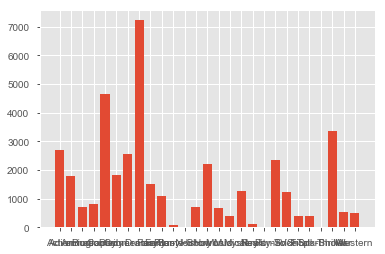

In [208]:
gen = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western']


valgen=[tAction,tAdventure,tAnimation, tBiography, tComedy, tCrime,
       tDocumentary, tDrama, tFamily, tFantasy, tFilm_Noir, tGame_Show,
       tHistory, tHorror, tMusic, tMusical, tMystery, tNews,
       tReality_TV, tRomance, tSci_Fi, tShort, tSport, tTalk_Show,
       tThriller, tWar, tWestern]

plt.bar(gen, valgen)
plt.show()

In [213]:
#valgen
#generos.feature_names
for i,j in zip(gen,valgen):
    print("{}:{}".format(i, j))

Action:2683
Adventure:1778
Animation:711
Biography:821
Comedy:4637
Crime:1833
Documentary:2546
Drama:7227
Family:1514
Fantasy:1089
Film-Noir:79
Game-Show:7
History:715
Horror:2201
Music:667
Musical:401
Mystery:1274
News:105
Reality-TV:22
Romance:2359
Sci-Fi:1228
Short:386
Sport:404
Talk-Show:19
Thriller:3354
War:539
Western:499


**Separando os filmes por plataforma**

In [118]:

netflix_movies = df.loc[df['Netflix'] == 1]
hulu_movies = df.loc[df['Hulu'] == 1]
prime_video_movies = df.loc[df['Prime Video'] == 1]
disney_movies = df.loc[df['Disney+'] == 1]

In [124]:

netflix_movies = netflix_movies.drop(['Hulu', 'Disney+', 'Prime Video' , 'Type','Genres'], axis = 1)
hulu_movies = hulu_movies.drop(['Netflix', 'Disney+','Prime Video', 'Type','Genres'], axis = 1)
prime_video_movies = prime_video_movies.drop(['Hulu', 'Netflix', 'Disney+', 'Type','Genres'], axis = 1)
disney_movies = disney_movies.drop(['Hulu','Netflix','Prime Video', 'Type','Genres'], axis = 1)

In [125]:
prime_video_movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Prime Video,Directors,Country,Language,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,Sergio Leone,"Italy,Spain,West Germany",Italian,...,0,0,0,0,0,0,0,0,0,1
6,7,The Pianist,2002,18+,8.5,95%,1,Roman Polanski,"United Kingdom,France,Poland,Germany","English,German,Russian",...,0,0,0,0,0,0,0,0,1,0
11,12,3 Idiots,2009,13+,8.4,100%,1,Rajkumar Hirani,India,"Hindi,English",...,0,0,0,0,0,0,0,0,0,0
15,16,Once Upon a Time in the West,1968,13+,8.5,95%,1,Sergio Leone,"Italy,United States","Italian,English,Spanish",...,0,0,0,0,0,0,0,0,0,1
31,32,Drive,2011,18+,7.8,92%,1,Nicolas Winding Refn,United States,"English,Spanish",...,0,0,0,0,0,0,0,0,0,0


In [126]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 43 columns):
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
Action             16744 non-null int64
Adventure          16744 non-null int64
Animation          16744 non-null int64
Biography          16744 non-null int64
Comedy             16744 non-null int64
Crime              16744 non-null int64
Do

In [136]:

#Quantidade de filmes em cada plataforma para fazer um grafico
netflix = netflix_movies.index
tnetflix_movies = len(netflix)


hulu = hulu_movies.index
thulu_movies = len(hulu)

prime = prime_video_movies.index
tprime_movies = len(prime)

disney = disney_movies.index
tdisney_movies = len(disney)


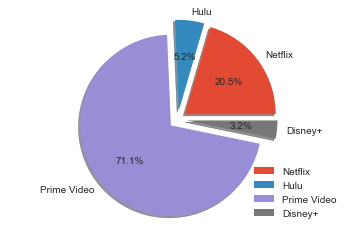

In [143]:

labels = 'Netflix' , 'Hulu', 'Prime Video', 'Disney+'
sizes = [tnetflix_movies,thulu_movies,tprime_movies,tdisney_movies]
explode = (0.1, 0.1, 0.1, 0.1 )

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)

# inseri a legenda e a localização da legenda.
plt.legend(labels, loc=4)


# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.show()

**Quantidade de filmes por plataforma que tem nota acima de 8 no IMDb**

In [148]:

rate_net = netflix_movies['IMDb'] > 8
print("Total de filmes na Netflix com IMDb 8+:",rate_net.sum())

Total de filmes na Netflix com IMDb 8+: 129


In [149]:
rate_dis = disney_movies['IMDb'] > 8
print("Total de filmes na Disney com IMDb 8+: :",rate_dis.sum())

Total de filmes na Disney com IMDb 8+: : 21


In [150]:
rate_prime = prime_video_movies['IMDb'] > 8
print("Total de filmes no Prime Video com IMDb 8+::",rate_prime.sum())

Total de filmes no Prime Video com IMDb 8+:: 324


In [151]:
rate_hulu = hulu_movies['IMDb'] > 8
print("Total de filmes na HULU com IMDb 8+: :",rate_hulu.sum())

Total de filmes na HULU com IMDb 8+: : 23


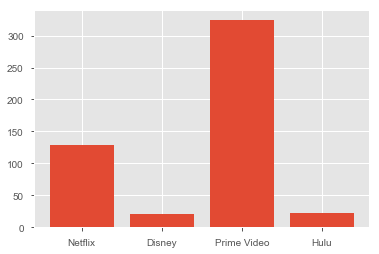

In [153]:
valores = [rate_net.sum(),rate_dis.sum(),rate_prime.sum(),rate_hulu.sum()]
plataformas = ['Netflix', 'Disney', 'Prime Video', 'Hulu']
plt.bar(plataformas, valores)
plt.show()

In [170]:
oldf= pd.read_csv('MoviesOnStreamingPlatforms_updated.csv', sep=',' )

In [171]:
oldf = oldf.drop(['Unnamed: 0'], axis=1) 

In [172]:
oldf = oldf.drop(['Type'], axis=1) 

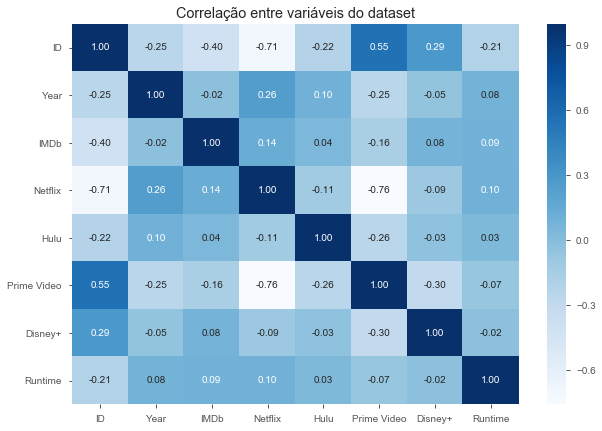

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(oldf.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

**Objetivo para a proxima etapa**

Usar regressão para prever o IMDb do filme com base no Diretor 

